<a href="https://colab.research.google.com/github/comodoro180/ICESI_MCD/blob/main/AnalisisExploratorioDatos/Analisis_bivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Planificación de la Producción de Muestras Médicas para 2024

## Descripción del problema

Una organización farmacéutica necesita planificar la producción mensual de muestras médicas para 2024. Actualmente, se producen muestras médicas específicas pero no alcanzan para cubrir la demanda y utilizan medicamentos fabricados para la venta. Los medicamentos que no son muestra médica y son usados como tal se identifican mediante un código y concepto de facturación específico; los que son muestras médicas se identifican con un código y un flag.

## Solución con ciencia de datos

Utilizando ciencia de datos, podemos analizar los datos históricos de los conceptos facturados que incluyen muestras médicas y no, de los últimos 5 años (2019-2023). Con técnicas de modelado predictivo, podemos estimar la cantidad mensual de unidades a producir en 2024 garantizando el inventario necesario de muestras médicas.

## Pregunta SMART

Basándonos en los datos históricos de los últimos 5 años (2019-2023) y considerando tanto los medicamentos producidos como muestras médicas como aquellos que no y son utilizados como tal, ¿cuántas unidades de muestras médicas se deben producir mensualmente de enero a diciembre de 2024 para garantizar que no sean usados los medicamentos destinados para la venta?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('input/reales_mm.csv')

df.head()

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,NEGOCIO,LINEA,MARCA,ARTICULO,INVENTARIO,FACTOR_CIAL,UE,UC
0,odscol,201903,90,90,11,112,BLP,802521,SALIDAS,18,432,24
1,odscol,201903,90,90,7,71,07I,708874,SALIDAS,300,1800,6
2,odscol,201903,90,90,100,827,BLC,1109737,SALIDAS,0,0,3
3,odscol,201903,90,90,7,78,MT4,74221,SALIDAS,40,16520,413
4,odscol,201903,90,90,7,71,EZA,710321,SALIDAS MM,10,7550,755


In [ ]:
df.shape

(155816, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155816 entries, 0 to 155815
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ORIGEN        155816 non-null  object
 1   PERIODO       155816 non-null  int64 
 2   PAIS_ORIGEN   155816 non-null  int64 
 3   PAIS_DESTINO  155816 non-null  int64 
 4   NEGOCIO       155816 non-null  int64 
 5   LINEA         155816 non-null  int64 
 6   MARCA         155816 non-null  object
 7   ARTICULO      155816 non-null  int64 
 8   INVENTARIO    155816 non-null  object
 9   FACTOR_CIAL   155816 non-null  object
 10  UE            155816 non-null  object
 11  UC            155816 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 14.3+ MB


In [ ]:
#Debido a que la columna de unidades estadisticas aparece como de tipo object, se cambia a int64

df['UE'] = df['UE'].str.replace(',','.').astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155816 entries, 0 to 155815
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ORIGEN        155816 non-null  object 
 1   PERIODO       155816 non-null  int64  
 2   PAIS_ORIGEN   155816 non-null  int64  
 3   PAIS_DESTINO  155816 non-null  int64  
 4   NEGOCIO       155816 non-null  int64  
 5   LINEA         155816 non-null  int64  
 6   MARCA         155816 non-null  object 
 7   ARTICULO      155816 non-null  int64  
 8   INVENTARIO    155816 non-null  object 
 9   FACTOR_CIAL   155816 non-null  object 
 10  UE            155816 non-null  float64
 11  UC            155816 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 14.3+ MB


In [ ]:
df.describe()
df['UC'].describe()

count    155816.000000
mean        493.593533
std        3221.675648
min     -112622.000000
25%           3.000000
50%          31.000000
75%         254.000000
max      796295.000000
Name: UC, dtype: float64

In [ ]:
df.isna().sum()

ORIGEN          0
PERIODO         0
PAIS_ORIGEN     0
PAIS_DESTINO    0
NEGOCIO         0
LINEA           0
MARCA           0
ARTICULO        0
INVENTARIO      0
FACTOR_CIAL     0
UE              0
UC              0
dtype: int64

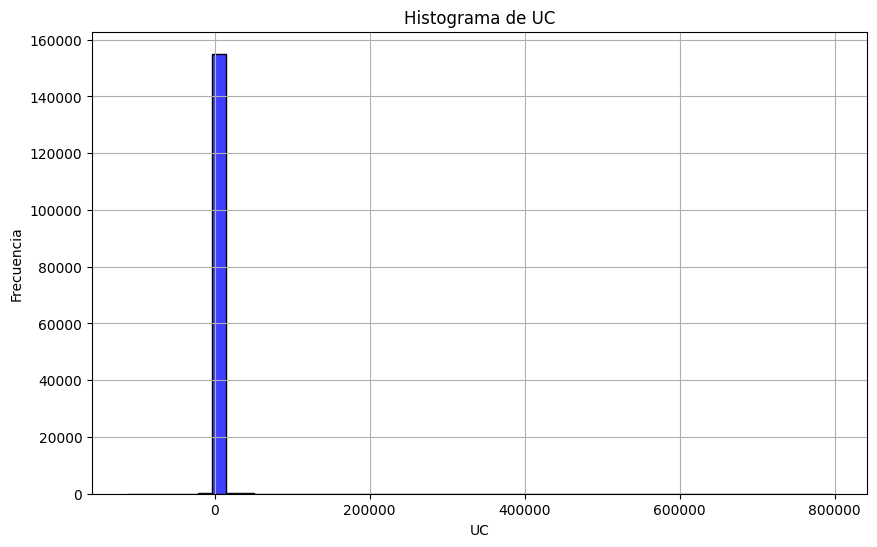

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['UC'], bins=50, kde=False, color='blue')
plt.title('Histograma de UC')
plt.xlabel('UC')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

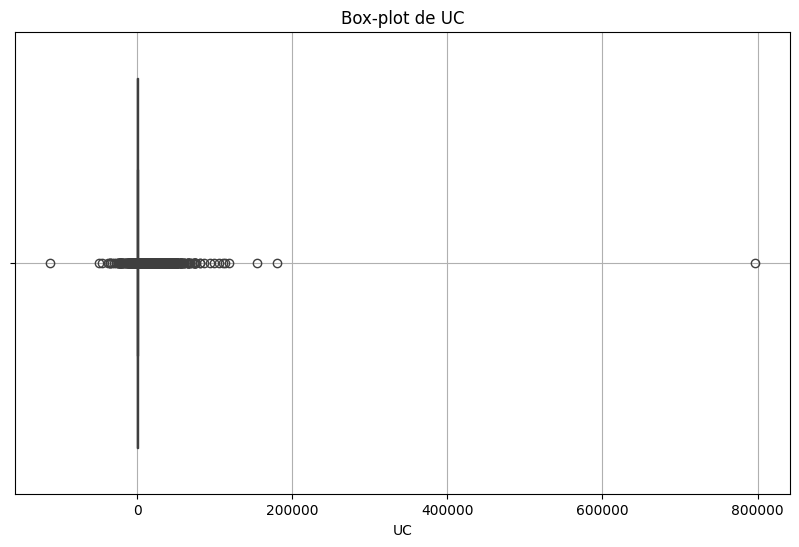

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['UC'])
plt.title('Box-plot de UC')
plt.xlabel('UC')
plt.grid(True)
plt.show()

In [ ]:
df['UC'].describe()

count    155816.000000
mean        493.593533
std        3221.675648
min     -112622.000000
25%           3.000000
50%          31.000000
75%         254.000000
max      796295.000000
Name: UC, dtype: float64

De acuerdo a los datos de la columna UC (Unidades comerciales), se puede evidenciar que el promedio 493.59 es mucho mayor que la mediana 31 y puede tener un sesgo. Una desviación estándar tan alta de 3221 indica que la dsitribución de los datos es muy variable.

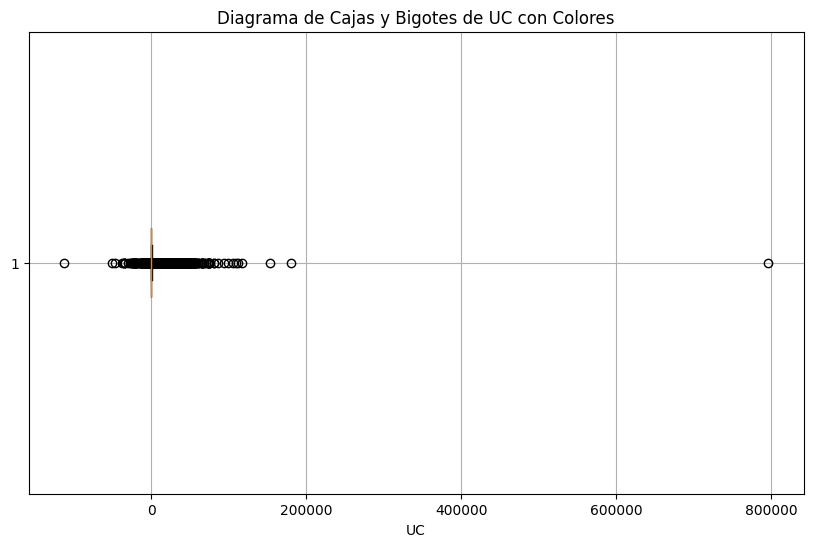

In [ ]:
# Crear el diagrama de cajas y bigotes usando matplotlib con colores personalizados
plt.figure(figsize=(10, 6))
box = plt.boxplot(df['UC'], vert=False, patch_artist=True)  # Habilitar el coloreado de las cajas

# Personalizar los colores
colors = ['skyblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Diagrama de Cajas y Bigotes de UC con Colores')
plt.xlabel('UC')
plt.grid(True)
plt.show()

In [ ]:
df.sort_values(by='UC' , ascending=False)

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,NEGOCIO,LINEA,MARCA,ARTICULO,INVENTARIO,FACTOR_CIAL,UE,UC
35997,odscol,202407,90,90,100,831,BLC,1180806,SALIDAS,0,0.00,796295
131838,odssvc,201806,28,28,19,196,SDM,2062413,SALIDAS MM,2,360000.00,180000
145410,odssvc,201908,28,28,19,196,SDM,2062413,SALIDAS MM,2,308000.00,154000
14776,odscol,202109,90,90,100,831,BLC,1153840,SALIDAS,0,0.00,117857
63724,odscol,202212,90,90,100,823,BLC,1165250,SALIDAS,0,0.00,112622
...,...,...,...,...,...,...,...,...,...,...,...,...
110025,odscol,202209,90,90,10,103,C4N,103723,SALIDAS MM,"0,02",-709.14,-35457
1031,odscol,201811,90,90,100,831,BLC,1121384,SALIDAS,0,0.00,-37300
41131,odscol,201912,90,90,100,819,BLC,1138492,SALIDAS,0,0.00,-46000
68551,odscol,201805,90,90,100,827,BLC,1113402,SALIDAS,0,0.00,-49996


In [ ]:
df_agr = df.groupby(['PERIODO','NEGOCIO','ARTICULO'], as_index=False)['UC'].sum()

df_agr

,PERIODO,NEGOCIO,ARTICULO,UC
0,201801,1,10001,507
1,201801,1,10018,-5
2,201801,1,10025,-13
3,201801,1,10131,0
4,201801,1,10209,5
...,...,...,...,...
138479,202407,100,1181632,0
138480,202407,100,1181649,-1
138481,202407,100,1181656,0
138482,202407,100,1181717,-1500


In [ ]:
df_agr['UC'].describe()

count    138484.000000
mean        555.369357
std        3456.426233
min     -112622.000000
25%           2.000000
50%          24.000000
75%         230.000000
max      796295.000000
Name: UC, dtype: float64

In [ ]:
df_agr.sort_values(by='UC', ascending=False)

,PERIODO,NEGOCIO,ARTICULO,UC
138457,202407,100,1180806,796295
10102,201806,19,2062413,180000
36548,201908,19,2062413,154000
78515,202109,100,1153840,117857
104928,202212,100,1165250,112622
...,...,...,...,...
97964,202209,10,103723,-35457
21091,201811,100,1121384,-37300
44989,201912,100,1138492,-46000
9058,201805,100,1113402,-49996


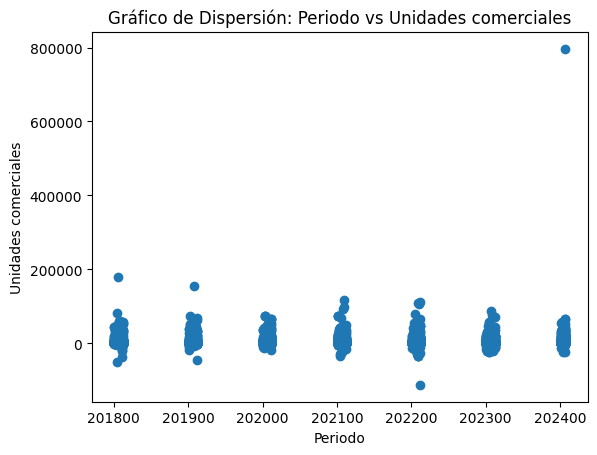

In [ ]:
# Crear el gráfico de dispersión
plt.scatter(df['PERIODO'], df['UC'])

# Añadir etiquetas y título
plt.xlabel('Periodo')
plt.ylabel('Unidades comerciales')
plt.title('Gráfico de Dispersión: Periodo vs Unidades comerciales')

# Mostrar el gráfico
plt.show()

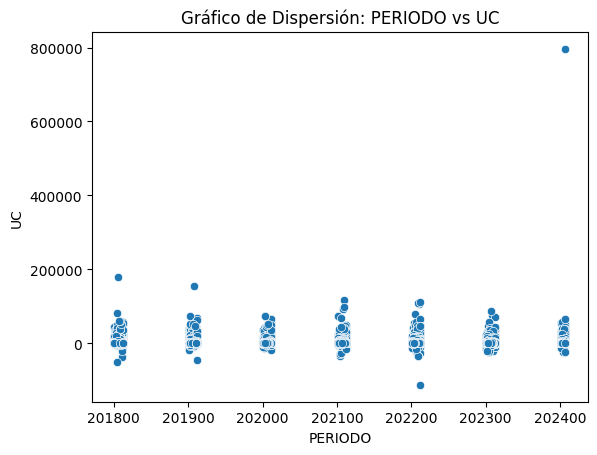

In [ ]:
import seaborn as sns

# Crear el gráfico de dispersión con seaborn
sns.scatterplot(x='PERIODO', y='UC', data=df)

# Añadir título
plt.title('Gráfico de Dispersión: PERIODO vs UC')

# Mostrar el gráfico
plt.show()

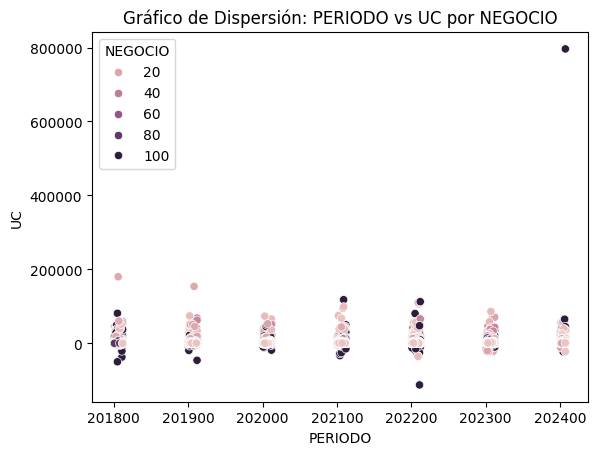

In [ ]:
# Crear un gráfico de dispersión con diferentes colores por negocio
sns.scatterplot(x='PERIODO', y='UC', hue='NEGOCIO', data=df)

# Añadir título
plt.title('Gráfico de Dispersión: PERIODO vs UC por NEGOCIO')

# Mostrar el gráfico
plt.show()

In [ ]:
# Calcular el rango intercuartílico (IQR) para identificar valores atípicos
Q1 = df['UC'].quantile(0.25)
Q3 = df['UC'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
outliers = df[(df['UC'] < lower_bound) | (df['UC'] > upper_bound)]

outliers_count = outliers.shape[0]
print(f'Total de valores atípicos {outliers_count}')
#lower_bound, upper_bound, outliers_count
print(f'Límite inferior para los valores atípicos: {lower_bound}')
print(f'Límite superior para los valores atípicos: {upper_bound}')

Total de valores atípicos 22606
Límite inferior para los valores atípicos: -373.5
Límite superior para los valores atípicos: 630.5


### Descripción de la importancia de la columna "UC":
La columna "UC" es crítica porque representa un valor numérico relevante relacionado con las unidades de control o consumo en el sistema. Este tipo de columna es clave para análisis de inventarios, distribución de recursos, o cualquier métrica operativa donde la cantidad es un factor determinante. Un correcto entendimiento de su comportamiento y variabilidad es esencial para tomar decisiones precisas en la planificación y optimización de procesos de producción.

### Análisis univariado:
Se realizó un análisis univariado sobre la columna "UC", incluyendo estadísticas descriptivas y visualización de la distribución a través de un histograma. Los principales hallazgos incluyen:
- Media: 493.59
- Mediana: 31
- Mínimo: -112,622
- Máximo: 796,295
- Desviación estándar: 3,221.68

Además, se identificaron valores atípicos significativos a través de un boxplot y el cálculo del rango intercuartílico (IQR), encontrando un total de 22,606 valores atípicos fuera del rango esperado.

### Conclusiones:
La columna "UC" muestra una gran dispersión de valores, con una mediana significativamente más baja que la media, lo que sugiere la influencia de valores atípicos extremos. La identificación de más de 22,000 valores atípicos indica la necesidad de un análisis adicional para determinar si estos valores son errores o representan datos válidos que podrían influir en la toma de decisiones operativas. Se recomienda una revisión exhaustiva de estos valores extremos para asegurar la precisión en futuros análisis.

El gráfico de dispersión por negocio muestra que el negocio 100 es el que genera la mayor cantidad de valorea atípicos, este negocio corresponde al material POP, es decir artículos que no son medicamentos y que no son producidos por la empresa. Por esta razon se decide excluir de la muestra el negocio en mención.

In [ ]:
# Se excluye el negocio 100
df = df[df['NEGOCIO'] != 100]

In [ ]:
df['UC'].describe()

count    119630.000000
mean        515.994750
std        2486.323666
min      -35457.000000
25%           5.000000
50%          44.000000
75%         308.000000
max      180000.000000
Name: UC, dtype: float64

In [ ]:
df.sort_values(by='UC' , ascending=False)

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,NEGOCIO,LINEA,MARCA,ARTICULO,INVENTARIO,FACTOR_CIAL,UE,UC
131838,odssvc,201806,28,28,19,196,SDM,2062413,SALIDAS MM,2,360000.00,180000
145410,odssvc,201908,28,28,19,196,SDM,2062413,SALIDAS MM,2,308000.00,154000
62929,odscol,202209,90,90,11,111,GFA,803425,SALIDAS MM,4,440496.00,110124
47982,odscol,202210,90,90,7,78,951,76180,SALIDAS,5,529605.00,105921
108817,odscol,202109,90,90,11,111,GFA,803425,SALIDAS MM,4,394472.00,98618
...,...,...,...,...,...,...,...,...,...,...,...,...
18050,odscol,202304,90,90,1,11,F75,178862,SALIDAS,1,-23657.00,-23657
14908,odscol,202107,90,90,7,73,AX1,70465,SALIDAS,20,-498060.00,-24903
79040,odscol,202209,90,90,10,103,CPC,100786,SALIDAS MM,"0,02",-700.22,-35011
77767,odscol,202209,90,90,10,103,C4O,100021,SALIDAS MM,"0,02",-705.22,-35261
